# **Import Library**

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import seaborn as sns
import shutil
import os

from keras.optimizers import Adam, SGD, RMSprop
from keras.models import Sequential
from keras.layers import Dense, MaxPooling1D, Flatten, Dropout
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from google.colab import drive, files
from keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder

## **TensorFlow Serving**

---



In [ ]:
# INSTALL TENSORFLOW SERVING
echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -

In [ ]:
!apt-get update
!apt-get install tensorflow-model-server

# **Memuat Dataset**

---

In [ ]:
# Mount ke Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Jalur ke file CSV di Google Drive
path = '/content/drive/MyDrive/Product Capstone Project/CSV/CSV.csv'

# Path folder tujuan di Colab
folder = '/content/File Csv/'

# Buat folder jika tidak ada
if not os.path.exists(folder):
    os.makedirs(folder)

# Salin file dari Drive ke Colab
shutil.copy(path, folder)

# Periksa apakah file telah berhasil disalin
if os.path.exists(folder + 'CSV.csv'):
    print("File CSV berhasil disalin ke folder 'File Csv' di Colab.")
else:
    print("Gagal menyalin file CSV.")

File CSV berhasil disalin ke folder 'File Csv' di Colab.


In [ ]:
# Membaca file CSV dan membuat DataFrame
df = pd.read_csv(path)

# Menampilkan beberapa baris dari DataFrame
df.head(10)

,Memperbaiki Barang,Merakit Benda,Membongkar-Pasang Barang,Mengutak-atik Barang,Menganalisis Masalah,Mencari Solusi,Menghitung,Berfikir Logis,Menari,Bermusik,...,Membantu,Menjual Benda,Mengelola Acara,Memimpin Kelompok,Membujuk Orang,Mengikuti Aturan,Mengurutkan,Membereskan Barang,Menjalankan Rutin,Fakultas
0,0,1,1,1,1,1,0,1,0,0,...,1,0,0,0,0,1,1,0,0,Ilmu Teknik
1,1,1,1,1,1,0,1,1,0,1,...,1,0,0,0,0,1,1,1,0,Ilmu Ekonomi dan Bisnis
2,1,1,0,0,1,1,0,1,0,0,...,1,0,1,1,1,1,1,1,1,Ilmu Sosial dan Humaniora
3,0,1,1,1,0,1,1,1,1,1,...,1,0,1,1,1,1,1,0,1,Ilmu Profesi dan Ilmu Terapan
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,1,1,1,Ilmu Seni
5,0,0,0,0,1,1,0,1,0,0,...,1,0,1,0,0,1,0,0,1,Ilmu Sosial dan Humaniora
6,1,1,0,0,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,Ilmu Pendidikan
7,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,Ilmu Teknik
8,1,0,1,1,0,0,1,1,0,1,...,1,0,0,1,1,1,1,1,1,Ilmu Komputer dan Teknologi
9,0,1,0,0,1,1,1,1,0,0,...,1,1,0,1,0,1,1,1,1,Ilmu Seni


In [ ]:
# Periksa jumlah data
print(f"Jumlah data: {len(df)}")
print(f"Jumlah kolom: {len(df.columns)}")

Jumlah data: 600
Jumlah kolom: 25


In [ ]:
df.dtypes

Memperbaiki Barang           int64
Merakit Benda                int64
Membongkar-Pasang Barang     int64
Mengutak-atik Barang         int64
Menganalisis Masalah         int64
Mencari Solusi               int64
Menghitung                   int64
Berfikir Logis               int64
Menari                       int64
Bermusik                     int64
Menggambar                   int64
Menulis Cerita               int64
Mengajar                     int64
Memberi Saran                int64
Memahami Orang Lain          int64
Membantu                     int64
Menjual Benda                int64
Mengelola Acara              int64
Memimpin Kelompok            int64
Membujuk Orang               int64
Mengikuti Aturan             int64
Mengurutkan                  int64
Membereskan Barang           int64
Menjalankan Rutin            int64
Fakultas                    object
dtype: object

In [ ]:
# Mengubah tipe data kolom fitur menjadi boolean
konversi_bool = ['Memperbaiki Barang', 'Merakit Benda', 'Membongkar-Pasang Barang', 'Mengutak-atik Barang', 'Menganalisis Masalah',
               'Mencari Solusi', 'Menghitung', 'Berfikir Logis', 'Menari', 'Bermusik', 'Menggambar', 'Menulis Cerita', 'Mengajar',
               'Memberi Saran', 'Memahami Orang Lain', 'Membantu', 'Menjual Benda', 'Mengelola Acara', 'Memimpin Kelompok',
               'Membujuk Orang', 'Mengikuti Aturan', 'Mengurutkan', 'Membereskan Barang', 'Menjalankan Rutin']

for kolom in konversi_bool:
    df[kolom] = df[kolom].astype(bool)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Memperbaiki Barang        600 non-null    bool  
 1   Merakit Benda             600 non-null    bool  
 2   Membongkar-Pasang Barang  600 non-null    bool  
 3   Mengutak-atik Barang      600 non-null    bool  
 4   Menganalisis Masalah      600 non-null    bool  
 5   Mencari Solusi            600 non-null    bool  
 6   Menghitung                600 non-null    bool  
 7   Berfikir Logis            600 non-null    bool  
 8   Menari                    600 non-null    bool  
 9   Bermusik                  600 non-null    bool  
 10  Menggambar                600 non-null    bool  
 11  Menulis Cerita            600 non-null    bool  
 12  Mengajar                  600 non-null    bool  
 13  Memberi Saran             600 non-null    bool  
 14  Memahami Orang Lain       

# **Memisahkan Fitur dan Label**

---

Memisahkan kolom yang menjadi 2 variabel yaitu Fakultas sebagai (**labels**) dan Minat, Bakat, dan Aspirasi peserta didik sebagai (**features**)

## FATUR

In [ ]:
# Memisahkan fitur dan label
features = df.iloc[:, :-1]  # Mengambil semua kolom kecuali kolom terakhir
labels = df.iloc[:, -1]     # Mengambil kolom terakhir sebagai label

print(features.shape)
print(labels.shape)

(600, 24)
(600,)


## ASEP

# **Preprocessing Data**

---



## FATUR

In [ ]:
# Konversi label kategorikal menjadi one-hot encoding
labels_one_hot = pd.get_dummies(labels)


# Memisahkan data menjadi data training dan data validation
train_features, test_features, train_labels, test_labels = train_test_split(features,
                                                                            labels_one_hot,
                                                                            test_size=0.2,
                                                                            random_state=42)

# Konversi DataFrame Pandas menjadi array NumPy
train_features = np.array(train_features)
test_features = np.array(test_features)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# Normalisasi fitur
train_features = tf.keras.utils.normalize(train_features, axis=1)
test_features = tf.keras.utils.normalize(test_features, axis=1)

## ASEP

In [ ]:
# Check dataset
df.info()

In [ ]:
# cek missing value
df.isnull.sum()

In [ ]:
# Cek tiap fakultas
df.fakultas.unique()

In [ ]:
# Cek distribusi tiap fakultas
df['fakultas'].value_counts()

https://www.kaggle.com/code/nitishkulkarni1006/multi-class-classification-with-keras-tensorflow

In [ ]:
# Bagi antara fitur dan target
x = df.drop('fakultas', axis=1) # hapus kolom fakultas
y = df['fakultas'] # fakultas

# Split antara train set dan test set
xtr, xts, ytr, yts = train_test_split(x,y,
                                      test_size=0.3,
                                      random_state=42)

In [ ]:
# Cek distribusi pada Train-set (Azp)
np.array(np.unique(xtr, return_counts=True))

In [ ]:
# Cek distribusi pada Test-set (Azp)
np.array(np.unique(xts, return_counts=True))

In [ ]:
data_train = tfds.load(df, split=tfds.Split.TRAIN)
data_val = tfds.load(df, split=tfds.Split.VALIDATION)
data_test = tfds.load(df, split=tfds.Split.TEST)
data_all = tfds.load(df, split=tfds.Split.ALL)

# **Membangun Model**

---

In [ ]:
# model ini blm komplit jdi silahkan research kita pake layer brp, dan layer yg terakhir jgn di ganti
model = Sequential([
    Dense(units=128, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(len(labels_one_hot.columns), activation="softmax")
])

# **Buat Class Callbacks**

---

Early stopping membantu mencegah overfitting dan menghasilkan model yang lebih baik dalam melakukan prediksi pada data baru yang belum pernah dilihat sebelumnya.

In [ ]:
early_stopping = EarlyStopping(monitor='accuracy',
                               patience=20,
                               restore_best_weights=True)

# **Compile dan Melatih Model**




---

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(train_features,
                    train_labels,
                    validation_data=(test_features, test_labels),
                    epochs=100,
                    verbose=1,
                    callbacks=[early_stopping])

# Menampilkan nilai accuracy dan val_accuracy pada akhir pelatihan
nilai_accuracy = round(history.history['accuracy'][-1] * 100)
nilai_val_accuracy = round(history.history['val_accuracy'][-1] * 100)
print(f'Nilai Accuracy: {nilai_accuracy}%')
print(f'Nilai Val_Accuracy: {nilai_val_accuracy}%')

Epoch 1/100
15/15 [==============================] - 1s 31ms/step - loss: 2.4196 - accuracy: 0.3167 - val_loss: 2.3566 - val_accuracy: 0.4500
Epoch 2/100
15/15 [==============================] - 0s 9ms/step - loss: 2.2381 - accuracy: 0.6313 - val_loss: 2.1715 - val_accuracy: 0.5667
Epoch 3/100
15/15 [==============================] - 0s 7ms/step - loss: 1.9805 - accuracy: 0.6875 - val_loss: 1.8817 - val_accuracy: 0.5667
Epoch 4/100
15/15 [==============================] - 0s 7ms/step - loss: 1.6232 - accuracy: 0.7083 - val_loss: 1.5340 - val_accuracy: 0.5917
Epoch 5/100
15/15 [==============================] - 0s 9ms/step - loss: 1.2612 - accuracy: 0.7563 - val_loss: 1.2136 - val_accuracy: 0.7000
Epoch 6/100
15/15 [==============================] - 0s 8ms/step - loss: 1.0017 - accuracy: 0.7708 - val_loss: 0.9888 - val_accuracy: 0.7583
Epoch 7/100
15/15 [==============================] - 0s 7ms/step - loss: 0.8348 - accuracy: 0.7792 - val_loss: 0.8919 - val_accuracy: 0.7583
Epoch 8/100


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               3200      
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dense_17 (Dense)            (None, 12)                1548      
                                                                 
Total params: 21260 (83.05 KB)
Trainable params: 21260 (83.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **Evaluasi Model**

---

In [ ]:
# Evaluasi model
loss, accuracy = model.evaluate(test_features, test_labels)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

4/4 [==============================] - 0s 7ms/step - loss: 1.7875 - accuracy: 0.8333
Loss: 1.7875134944915771
Accuracy: 0.8333333134651184


In [ ]:
# Prediksi dengan model yang telah dilatih
predictions = model.predict(test_features)

4/4 [==============================] - 0s 4ms/step


# **Melihat arsitektur model**

In [ ]:
# Melihat arsitektur model
plot_model("nama model",show_shapes=True)

# **Visualisasi Data**

---

| Algorithnm | Kolom 1) | Kolom 2 | Kolom 3 | Kolom 4
| --- | --- | --- | --- | --- |
| NEURAL NETWORK 1 | 0.869 | 0.788 | 0.820 | 0.833|
| NEURAL NETWORK 2 | 0.827 | 0.780 | 0.790 | 0.785 |

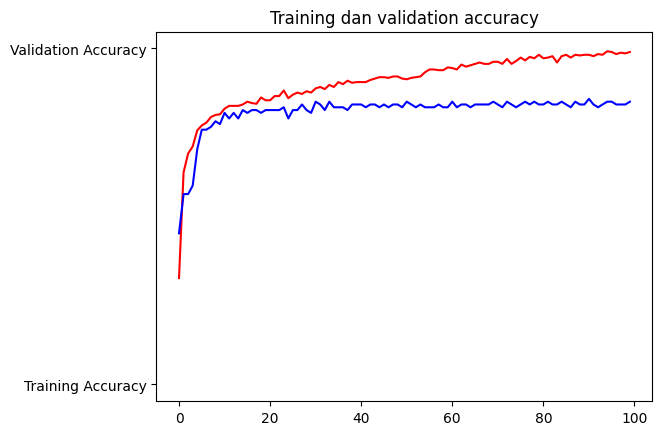

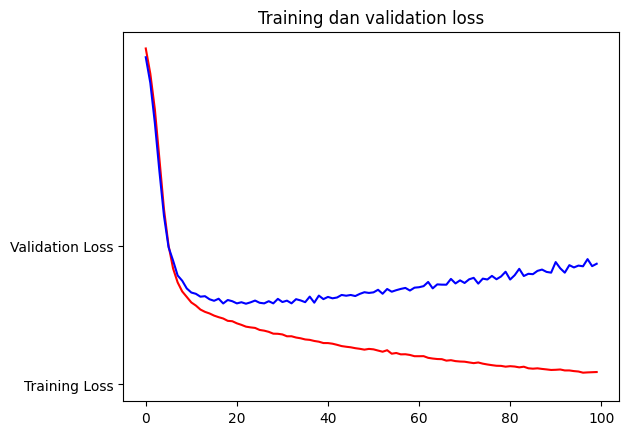

In [ ]:
# Ambil list hasil data training dan validation
# set untuk setiap epoch training

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Mengambil jumlah epoch

# plot training dan validation per epoch
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training dan validation accuracy')
plt.show()
print("")

# plot training dan validation loss per epoch
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.title('Training dan validation loss')
plt.show()

# **Save Model**

---

# **Save Model**

---

In [ ]:
model.save("sistem_rekomendasi_jurusan.h5")